# Report the Annual Profit for each product

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('toys.csv')
df.head()

,Quarter,Product,Expenditure,Revenue
0,Q1,Board,274846,338768
1,Q1,Outdoor,278236,282378
2,Q1,Wooden,264788,268292
3,Q2,Board,345234,387362
4,Q2,Legos,383764,453534


## How many rows and columns do we have ?

In [3]:
n_rows, n_cols = df.shape

In [4]:
n_rows

17

In [5]:
n_cols

4

## Which Products are mentioned in this dataset ?

In [6]:
df.Product.unique()

array(['Board', 'Outdoor', 'Wooden', 'Legos', 'Puzzles'], dtype=object)

- How many instances are there for each product

In [7]:
df.Product.value_counts()

Product
Board      4
Outdoor    4
Wooden     4
Legos      3
Puzzles    2
Name: count, dtype: int64

In [12]:
# ! pip install seaborn

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
sns.set()

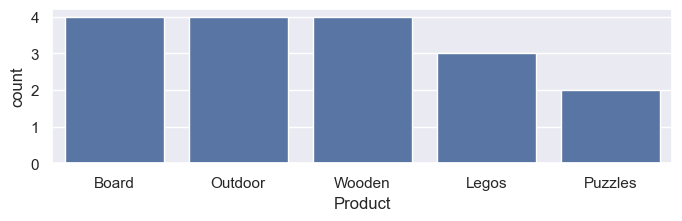

In [22]:
fig, ax = plt.subplots(figsize=(8, 2))

axr = sns.countplot(
    data = df,
    x = "Product",
    ax = ax
)

## Annual Expenditure and Revenue for each Product

|Product|Revenue|Expenditure|
|-|-|-|
|Board|1.2|.9|
|Puzzles|1.5|1.6|

In [24]:
df.head()

,Quarter,Product,Expenditure,Revenue
0,Q1,Board,274846,338768
1,Q1,Outdoor,278236,282378
2,Q1,Wooden,264788,268292
3,Q2,Board,345234,387362
4,Q2,Legos,383764,453534


In [31]:
df.drop(columns=['Quarter']).pivot_table(index="Product")

# pivot_table by default aggregates using "mean" ( average )

,Expenditure,Revenue
Product,,
Board,360519.0,401168.5
Legos,457210.0,510372.0
Outdoor,304782.5,331139.5
Puzzles,338425.0,369211.0
Wooden,255748.0,268216.5


### What is the annual expenditure for Puzzles

In [33]:
df[df.Product == "Puzzles"].Expenditure.sum()

676850

In [30]:
df[df.Product == "Puzzles"].Expenditure.mean()

338425.0

In [34]:
df_pvt = ( df
         .drop(columns=['Quarter'])
         .pivot_table(index="Product",
                     aggfunc="sum")
        )
df_pvt

,Expenditure,Revenue
Product,,
Board,1442076,1604674
Legos,1371630,1531116
Outdoor,1219130,1324558
Puzzles,676850,738422
Wooden,1022992,1072866


### What is the expenditure for Legos

In [36]:
df_pvt.loc['Legos', 'Expenditure']

1371630

### Which is the 3rd highest expenditure?

- sort by Expenditure
- get the 3rd row

In [41]:
(df_pvt
 .sort_values('Expenditure',
                  ascending=False)
 # Cheated to find the Product name : Outdoor
 .loc['Outdoor' , 'Expenditure']
)

1219130

In [43]:
(df_pvt
 .sort_values('Expenditure',
                  ascending=False)
 #.iloc[ row_idx, col_idx], # index starts from 0
 .iloc[ 2, 0],
)

(1219130,)

In [44]:
df_pvt.reset_index()

,Product,Expenditure,Revenue
0,Board,1442076,1604674
1,Legos,1371630,1531116
2,Outdoor,1219130,1324558
3,Puzzles,676850,738422
4,Wooden,1022992,1072866


In [45]:
df.head()

,Quarter,Product,Expenditure,Revenue
0,Q1,Board,274846,338768
1,Q1,Outdoor,278236,282378
2,Q1,Wooden,264788,268292
3,Q2,Board,345234,387362
4,Q2,Legos,383764,453534


In [50]:
df4 = df[df.Quarter == "Q4"].set_index('Product')
df4

,Quarter,Expenditure,Revenue
Product,,,
Board,Q4,376234,394798
Legos,Q4,491028,559236
Outdoor,Q4,336822,369436
Puzzles,Q4,339384,344636
Wooden,Q4,222356,243842


### Fetch the 2 last row ?

In [51]:
df4.iloc[-2]

Quarter            Q4
Expenditure    339384
Revenue        344636
Name: Puzzles, dtype: object

### Fetch information about Legos

In [52]:
df4.loc['Legos']

Quarter            Q4
Expenditure    491028
Revenue        559236
Name: Legos, dtype: object

## Calculate Annual Profit

In [53]:
df_pvt

,Expenditure,Revenue
Product,,
Board,1442076,1604674
Legos,1371630,1531116
Outdoor,1219130,1324558
Puzzles,676850,738422
Wooden,1022992,1072866


In [54]:
df_pvt.Revenue - df_pvt.Expenditure

Product
Board      162598
Legos      159486
Outdoor    105428
Puzzles     61572
Wooden      49874
dtype: int64

In [55]:
df_pvt.loc[:, 'Profit'] = df_pvt.Revenue - df_pvt.Expenditure
df_pvt

,Expenditure,Revenue,Profit
Product,,,
Board,1442076,1604674,162598
Legos,1371630,1531116,159486
Outdoor,1219130,1324558,105428
Puzzles,676850,738422,61572
Wooden,1022992,1072866,49874


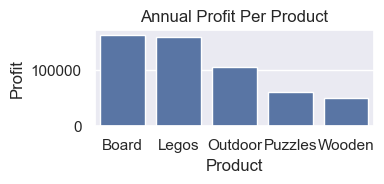

In [71]:
fig, ax = plt.subplots(figsize=(4, 2))

ax = sns.barplot(
        data = (df_pvt
               .reset_index()
               # .sort_values('Revenue')
               ),
        x = "Product",
        y = "Profit",
        ax = ax
    );

plt.title("Annual Profit Per Product");
plt.tight_layout()
plt.savefig('annual_report.png')

## Export the Profit table and grpah into Excel file

In [76]:
! pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.6 MB/s eta 0:00:00


In [78]:
excel_filename = "Annual_Report.xlsx"
worksheet_name = "2014"

In [80]:
from io import BytesIO

image_data = BytesIO()
ax.figure.savefig(image_data)

In [82]:
with pd.ExcelWriter(excel_filename, engine="xlsxwriter") as FH:
    df_pvt.to_excel(FH, sheet_name = worksheet_name)
    shobj = FH.sheets[worksheet_name]
    shobj.insert_image('F4', '' , {'image_data': image_data})